# Ⅱ. 데이터와 표본분포

## 1. 임의표본추출과 표본편향
---
- **표본(sample)**: 더 큰 데이터 집합으로부터 얻은 데이터의 부분집합
- **모집단(population)**: 어떤 데이터 집합을 구성하는 전체 대상 혹은 전체 집합
- **N(n)**: 모집단(표본)의 크기
- **임의표본추출(= 랜덤표본추출, random sampling)**: 무작위로 표본을 추출하는 것
- **단순임의표본(simple random sample)**: 모집단 층화 없이 임의표본추출로 얻은 표본
- **층화표본추출(stratified sampling)**: 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
    - 예시 - 백인, 흑인, 라틴계 유권자들의 투표 성향
- **계층(stratum pl.strata)**: 공통된 특징을 가진 모집단의 동종 하위 그룹
- **편향(bias)**: 계통상의 오류
- **표본편향(sample bias)**: 모집단을 잘못 대표하는 표본
<br></br>
- **복원추출(with replacement)**
- **비복원추출(without replacement)**

### A. 편향
---
- **통계적 편향**: 측정 과정 혹은 표본추출 과정에서 발생하는 계통적인 오차
- 임의표본추출로 인한 오류 (빗나간 총알) vs 편향에 따른 오류 (치우친 탄착군)

### B. 임의 선택

### C. 크기와 품질: 크기는 언제 중요해질까?

### D. 표본평균과 모평균
---
- **$\bar{x}$ vs $\mu$**
    - $\bar{x}$
        - 모집단의 표본평균
        - *관찰*을 통해 얻어짐
    - $\mu$
        - 모집단의 평균
        - 주로 작은 표본들로부터 *추론*함

## 2. 선택편향
---
- **선택편향(selection bias)**: 관측 데이터를 선택하는 방식 때문에 생기는 편향
- **data snooping**
- **방대한 검색 효과(vast search effect)**

### A. 평균으로의 회귀
---
- 예외적인 경우가 관찰되면 그다음에는 중간 정도의 경우가 관찰되는 경향
- 이 예외 경우를 너무 특별히 생각하고 의미를 부여하면 선택편향으로 이어질 수 있음
```
여기서 '회귀'는 단순히 '돌아간다'는 개념으로 선형 회귀와는 다르다.
```

## 3. 통계학에서의 표본분포
---
- **표본통계량(sample statistic)**: 더 큰 모집단에서 추출된 표본 데이터들로부터 얻은 측정 지표
- **데이터 분포(data distribution)**: 어떤 데이터 집합에서의 각 개별 값의 도수분포
- **표본분포(sampling distribution)**: 여러 표본들 혹은 재표본들로부터 얻은 표본통계량의 도수분포
- **중심극한정리(Central Limit Theorem)**: 표본크기가 커질수록 표본분포가 정규분포를 따르는 경향
- **표준오차(standard error)**: 여러 표본들로부터 얻은 표본통계량의 변동성
    - 개별 데이터 값들의 변동성을 뜻하는 *표준편차*와 혼동하지 말 것
<br></br>
- **표본의 변동성(sampling variability)**

```
개별 데이터 포인트의 분포(데이터 분포)와 표본통계량의 분포(표본분포)를 잘 구별해야 함
```

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
loans_income = pd.read_csv('../data/loans_income.csv').squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
11473   33532.0  Data
7196    98000.0  Data
6911    90000.0  Data
40133   50000.0  Data
45685  190000.0  Data


c:\Users\Yeo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Yeo\AppData\Local\Temp\ipykernel_11100\723397296.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


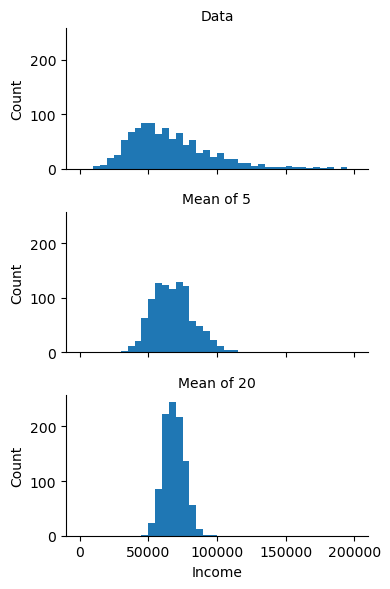

In [3]:
g = sns.FacetGrid(results, col='type', col_wrap=1,
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### A. 중심극한정리

### B. 표준오차
---
- 통계에 대한 표본분포의 변동성을 나타내는 단일 측정 지표
- $SE={s \over \sqrt{n}}$
- **n 제곱근의 법칙(square-root of n rule)**: 표준오차를 $n$배로 줄이려면 표본 크기를 $n^2$배 증가시켜야 함

## 4. 부트스트랩
---
- **부트스트랩(bootstrap)**: *현재 있는 표본*에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것
- 부트스트랩 표본
- **재표본추출(resampling)**: 관측 데이터로부터 반복해서 표본추출하는 과정
    - 부트스트랩과 순열(셔플링) 과정 포함

In [4]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -73.71199999999953
std. error: 213.34648996592622


```
분류 및 회귀 트리(a.k.a. 의사 결정 트리)를 사용할 때,
여러 부트스트랩 샘플을 가지고 트리를 여러 개 만든 다음 각 트리에서 나온 예측값을 평균 내는 것이
일반적으로 단일 트리를 사용하는 것보다 효과적이다.
이 과정을 배깅이라고 한다.
```

```
※ 부트스트랩의 역할

표본크기가 작은 것을 보완함 X
새 데이터를 만듦 X
기존 데이터 집합의 빈 곳을 채움 X
모집단에서 추가적으로 표본을 뽑는다고 할 때, 그 표본이 얼마나 원래 표본과 비슷할지를 알려줌 O
```

### A. 재표본추출 vs 부트스트래핑
---
- 재표본추출
    - 여러 표본이 결합되어 비복원추출을 수행할 수 있는 순열 과정 포함
- 부트스트랩
    - 항상 관측된 데이터로부터 복원추출

## 5. 신뢰구간
---
- **신뢰수준(confidence level)**: 같은 모집단으로부터 같은 방식으로 얻은, 관심 통계량을 포함할 것으로 예상되는, *신뢰구간의 백분율*
    - 신뢰수준이 높을수록 신뢰구간은 넓어짐
- **구간끝점(interval endpoint)**: 신뢰구간의 최상위, 최하위 끝점

```
90% 신뢰구간이란?
표본통계량의 부트스트랩 표본분포의 90%를 포함하는 구간 O
참값이 일정 구간 안에 있을 확률 90% X
```


## 6. 정규분포
---
- **오차(error)**: 데이터 포인트와 예측값 혹은 평균 사이의 차이
- **표준화(=정규화)하다(standardize)**: 평균을 빼고 표준편차로 나눈다
- **z-score**: 개별 데이터 포인트를 정규화한 결과
- **표준정규분포(standard normal distribution)**: 평균=0 표준편차=1인 정규분포
- **QQ-plot**: 표본분포가 특정 분포에 얼마나 가까운지를 보여주는 그림

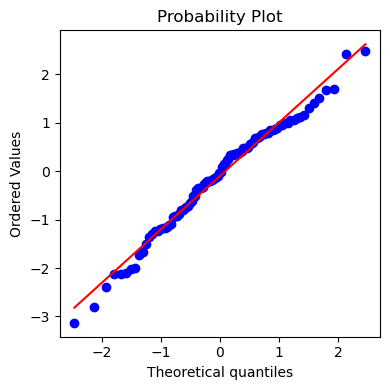

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## 7. 